In [1]:
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

def plot(x, y):
    plt.xlabel('n')
    plt.ylabel('length')
    plt.plot(x, y)
    plt.show()
    
    
THETA = 0
SIGMA2 = 1

GAMMA = 0.5
N = 50

### First distribution
The length of the interval tends to 0

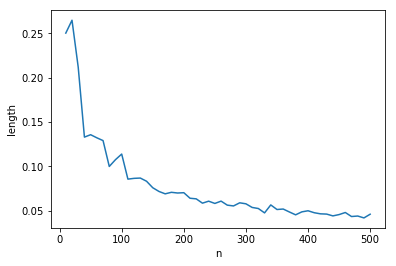

In [2]:
def get_interval_1(x, gamma):
    z_r = stats.chi2.ppf((1 + gamma) / 2, len(x), loc=0, scale=1)
    z_l = stats.chi2.ppf((1 - gamma) / 2, len(x), loc=0, scale=1)
    
    M = np.sum((x - THETA) ** 2)
    return np.sqrt(M / z_r), np.sqrt(M / z_l)


x = np.linspace(10, 500, N)
y = np.zeros(N)

for i in np.arange(N):
    l, r = get_interval_1(np.random.normal(loc=THETA, scale=SIGMA2, size=int(x[i])), GAMMA)
    y[i] = r - l
    
plot(x, y)

### Second distribution
The length of the interval **doesn't** tend to 0

In [3]:
# \sigma >= |M| / z
def get_interval_2(x, gamma):
    z = stats.norm.ppf((1 + gamma) / 2, loc=0, scale=1)
    M = math.sqrt(len(x)) * (np.average(x) - THETA)
    
    return abs(M) / z

get_interval_2(np.random.normal(loc=THETA, scale=SIGMA2, size=10), GAMMA)

2.7686224063606257